In [30]:
import calendar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imageio
from IPython.display import Video

from data_helpers import *

In [31]:
def plot_discrete(index, database, max_deaths, prediction, country_name):
    lim_data = max( clean_nan(database['discrete']) ) + ( max( clean_nan(database['discrete']))/ 2 )
    max_y = max(clean_nan(database['pred_discrete_upper'])) + max(clean_nan(database['pred_discrete_upper']))/2
    
    plt.close('all')
    plt.rcParams["figure.figsize"] = (15,6)
    plt.rcParams['figure.constrained_layout.use'] = True
    
    plt.plot(index, database['discrete'], label=f'real deaths {max_deaths}', linewidth=5, color = 'black')
    plt.plot(index, database['pred_discrete_low'],   label = f'pred deaths: {clean_nan(database["pred_cummulative_low"]  ) [-1]}')
    plt.plot(index, database['pred_discrete_mean'],  label = f'pred deaths: {clean_nan(database["pred_cummulative_mean"] ) [-1]}')
    plt.plot(index, database['pred_discrete_upper'], label = f'pred deaths: {clean_nan(database["pred_cummulative_upper"]) [-1]}')
    
    plt.fill_between(index, database['pred_discrete_low'], database['pred_discrete_upper'], color='b', alpha=.1)
    
    plt.title(f' predicted deaths for September: {sum(clean_nan(database["pred_discrete_mean"])) }', fontsize=25,pad=20)
    plt.suptitle(f'{country_name.upper()}_{calendar.month_name[int(prediction[-9:-7])]}-{prediction[-6:-4]}', fontsize=20,ha='left',va='top')
    plt.ylabel('Deaths for Covid19')
    plt.ylim(0, max(max_y,lim_data))
    plt.legend(fontsize=20,loc=0)
    plt.xlabel(f'Real deaths: {max_deaths}', fontsize = 20)
    
    plt.savefig(f'plots/{country_name}/discrete/{prediction[-14:-4]}.jpg')
    
def plot_cummulative(index, database, max_deaths, prediction, country_name):
    
    plt.close('all')
    plt.rcParams["figure.figsize"] = (15,6)
    
    plt.plot(index, database['cummulative'], label=f'real deaths {max_deaths}', linewidth=5, color = 'black')
    plt.plot(index, database['pred_cummulative_low'],   label = f'pred deaths: {clean_nan(database["pred_cummulative_low"]  ) [-1]}')
    plt.plot(index, database['pred_cummulative_mean'],  label = f'pred deaths: {clean_nan(database["pred_cummulative_mean"] ) [-1]}')
    plt.plot(index, database['pred_cummulative_upper'], label = f'pred deaths: {clean_nan(database["pred_cummulative_upper"]) [-1]}')
    
    plt.fill_between(index, database['pred_cummulative_low'], database['pred_cummulative_upper'], color='b', alpha=.1)
    
    plt.xlabel(f'Real deaths: {max_deaths}', fontsize = 20)
    plt.ylabel('Deaths for Covid19')
    plt.title(f' deaths for September: {max(clean_nan(database["pred_cummulative_mean"]))}', fontsize=25,pad=20)
    plt.suptitle(f'{country_name.upper()}_{calendar.month_name[int(prediction[-9:-7])]}-{prediction[-6:-4]}', fontsize=20,ha='left', va='top')
    plt.legend(fontsize=16,loc='upper left')

    
    plt.savefig(f'plots/{country_name}/cummulative/{prediction[-14:-4]}.jpg')

In [32]:
def process_plot(index, cummulative, discrete, prediction, country_name):
    
    pred = pd.read_csv(f'predictions/{country_name}/{prediction}')
    pred['date'] = pd.to_datetime(pred.date)
    
    database = {
        
        'cummulative': [],
        'discrete': [],
        'pred_cummulative_low':[],
        'pred_cummulative_mean':[],
        'pred_cummulative_upper':[],
        'pred_discrete_low': [],
        'pred_discrete_mean':[],
        'pred_discrete_upper':[],
    }
    
    for date in index:
        try:
            database['cummulative'].append(cummulative[cummulative.date == date].deaths.values[0])
        except:
            database['cummulative'].append(np.nan)
        try:
            database['discrete'].append(discrete[discrete.date == date].deaths.values[0])
        except:
            database['discrete'].append(np.nan)
        try:
            database['pred_cummulative_low'].append(pred[pred.date == date].predicted_total_deaths_lower.values[0])
        except:
            database['pred_cummulative_low'].append(np.nan)
        try:
            database['pred_cummulative_mean'].append(pred[pred.date == date].predicted_total_deaths_mean.values[0])
        except:
            database['pred_cummulative_mean'].append(np.nan)
        try:
            database['pred_cummulative_upper'].append(pred[pred.date == date].predicted_total_deaths_upper.values[0])
        except:
            database['pred_cummulative_upper'].append(np.nan)
        try:
            database['pred_discrete_low'].append(pred[pred.date == date].predicted_deaths_lower.values[0])
        except:
            database['pred_discrete_low'].append(np.nan)
        try:
            database['pred_discrete_mean'].append(pred[pred.date == date].predicted_deaths_mean.values[0])
        except:
            database['pred_discrete_mean'].append(np.nan)
        try:
            database['pred_discrete_upper'].append(pred[pred.date == date].predicted_deaths_upper.values[0])
        except:
            database['pred_discrete_upper'].append(np.nan)
    
    
    
    plot_cummulative(index, database, max(clean_nan(cummulative.deaths)), prediction, country_name)

    plot_discrete(index, database, max(clean_nan(cummulative.deaths)), prediction, country_name)

In [33]:
def get_animation(country_name):
    
    get_files(country_name)
        
    if not os.path.exists(f'plots/{country_name}/cummulative'):
        os.makedirs(f'plots/{country_name}/cummulative')
    if not os.path.exists(f'plots/{country_name}/discrete'):
        os.makedirs(f'plots/{country_name}/discrete')
    if not os.path.exists(f'results/{country_name}'):    
        os.makedirs(f'results/{country_name}')
    
    files_dir = os.listdir(f'predictions/{country_name}')
    
    oldest_file = min([pd.to_datetime(x[-14:-4]) for x in files_dir])
    newest_file = max([pd.to_datetime(x[-14:-4]) for x in files_dir])
    
    oldest_file= pd.read_csv(f'predictions/{country_name}/{country_name}_{str(oldest_file)[:10]}.csv')
    newest_file = pd.read_csv(f'predictions/{country_name}/{country_name}_{str(newest_file)[:10]}.csv')
        
    start_date = min(pd.to_datetime(oldest_file.date.copy()))
    end_date   = max(pd.to_datetime(newest_file.date.copy()))
    
    index = pd.date_range(start = start_date, end = end_date)
    
    cummulative = pd.DataFrame()
    cummulative['date'] = pd.to_datetime(newest_file.date.copy())
    cummulative['deaths']= newest_file.total_deaths
    cummulative = eliminate_negatives(cummulative)
    
    discrete = pd.DataFrame()
    discrete['date'] = pd.to_datetime(newest_file.date.copy())
    discrete['deaths']= newest_file.actual_deaths
    discrete = eliminate_negatives(discrete)
    
    for file in files_dir:
        process_plot(index, cummulative, discrete, file, country_name)
    
    # repeate last image
    pic_dates  = [x[:-4] for x in os.listdir(f'plots/{country_name}/cummulative')]
    max_date = str(max(pd.to_datetime(pic_dates)))[:10]
    
    for _ in range(50):
        copy2(f'plots/{country_name}/cummulative/{max_date}.jpg', f'plots/{country_name}/cummulative/{max_date}_{_}.jpg')
        copy2(f'plots/{country_name}/discrete/{max_date}.jpg', f'plots/{country_name}/discrete/{max_date}_{_}.jpg')
    
    cum_images = []
    
    for filename in os.listdir(f'plots/{country_name}/cummulative'):
        cum_images.append(imageio.imread(os.path.join(f'plots/{country_name}/cummulative',filename)))
    imageio.mimsave(f'results/{country_name}/cummulative_{country_name}.mp4', cum_images)
    
    dis_images = []
    
    for filename in os.listdir(f'plots/{country_name}/discrete'):
        dis_images.append(imageio.imread(os.path.join(f'plots/{country_name}/discrete',filename)))
    imageio.mimsave(f'results/{country_name}/discrete_{country_name}.mp4', dis_images)

    

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1080, 432) to (1088, 432) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1080, 432) to (1088, 432) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


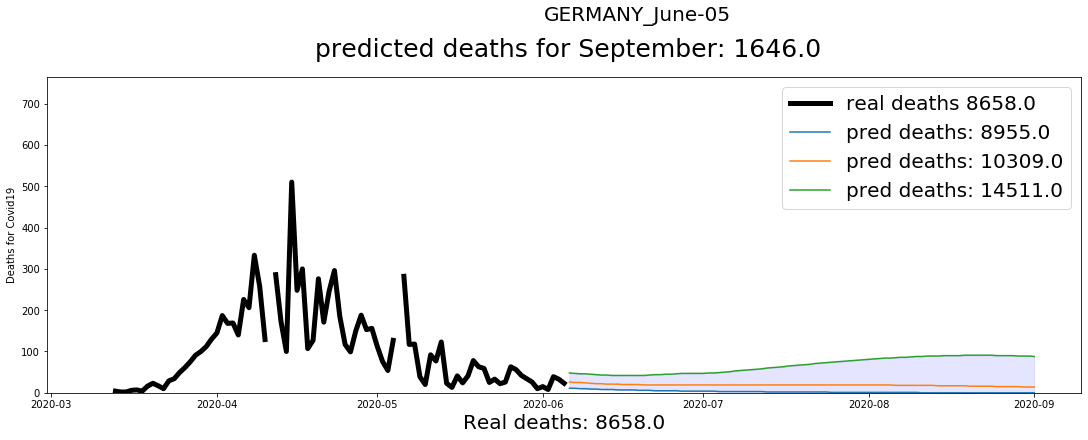

In [39]:
get_animation('Germany')

In [ ]:
images = []
for filename in os.listdir('imgs/discrete'):
    images.append(imageio.imread(os.path.join('imgs/discrete',filename)))
imageio.mimsave('discrete.gif', images, duration=0.3)